In [1]:
# https://docs.voxel51.com/tutorials/cvat_annotation.html#Annotating-Datasets-with-CVAT
import fiftyone as fo
import fiftyone.zoo as foz

# 組み込みの FiftyOne Dataset Zoo を使用して、
# Open Images V6 データセットからいくつかの画像をダウンロードする
dataset = foz.load_zoo_dataset(
    "open-images-v6",
    split="validation",
    label_types=[],
    max_samples=200,
)

# データセットを永続化して、将来のPythonセッションでアクセスできるようにする
dataset.persistent = True


Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'open-images-v6-validation-200'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



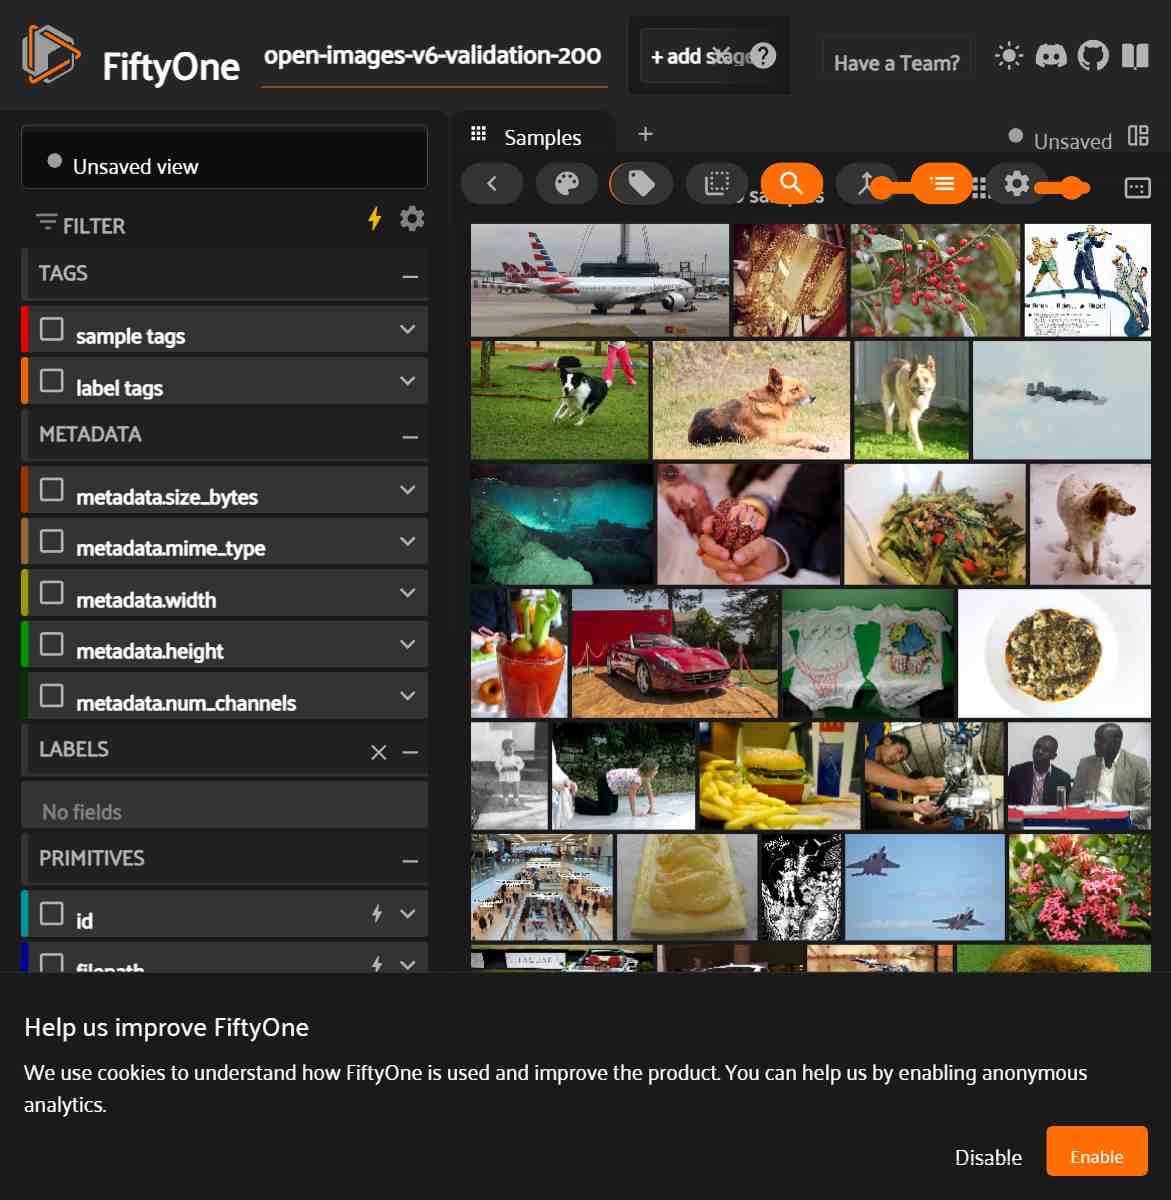

In [3]:

# FiftyOneアプリで視覚化する
session = fo.launch_app(dataset)



In [4]:
session.freeze() 

In [7]:
import fiftyone.brain as fob

results = fob.compute_similarity(dataset, brain_key="img_sim")
results.find_unique(100)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /home/takashi/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100.0%


Computing embeddings...
 100% |█████████████████| 200/200 [3.4s elapsed, 0s remaining, 72.8 samples/s]       
Computing unique samples...
Generating index for 200 embeddings...
Index complete
threshold: 1.000000, kept: 7, target: 100
threshold: 0.500000, kept: 177, target: 100
threshold: 0.750000, kept: 68, target: 100
threshold: 0.625000, kept: 127, target: 100
threshold: 0.687500, kept: 93, target: 100
threshold: 0.656250, kept: 106, target: 100
threshold: 0.671875, kept: 99, target: 100
threshold: 0.664062, kept: 105, target: 100
threshold: 0.667969, kept: 102, target: 100
threshold: 0.669922, kept: 101, target: 100
threshold: 0.670898, kept: 100, target: 100
Uniqueness computation complete


In [8]:
vis_results = fob.compute_visualization(dataset, brain_key="img_vis")

plot = results.visualize_unique(visualization=vis_results)
plot.show()


PackageError: You must install the `umap-learn>=0.5` package in order to use UMAP-based visualization. This is recommended, as UMAP is awesome! If you do not wish to install UMAP, try `method='tsne'` instead

If you think this error is inaccurate, you can set `fiftyone.config.requirement_error_level` to 1 (warning) or 2 (ignore).
See https://docs.voxel51.com/user_guide/config.html for details.

In [9]:
unique_view = dataset.select(results.unique_ids)
session.view = unique_view

# Randomly select 5 samples to load to CVAT
unique_5_view = unique_view.take(5)

# A unique identifer for this run
anno_key = "segs_run"

# Upload the samples and launch CVAT
anno_results = unique_5_view.annotate(
    anno_key,
    label_field="segmentations",
    label_type="instances",
    classes=["person", "vehicle", "animal"],
    launch_editor=True,
)

Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


HTTPError: 400 Client Error: Bad Request for url: https://app.cvat.ai/api/auth/login